<a href="https://colab.research.google.com/github/grinaldo-oliveira/SibGrapi/blob/main/TSNE_PRODU%C3%87%C3%83O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Doutorado/SibGrapi

/content/drive/MyDrive/Doutorado/SibGrapi


In [ ]:
# from sklearn.manifold import TSNE
import cuml
from cuml.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import PAIRWISE_DISTANCE_FUNCTIONS
import numpy as np
import matplotlib.pyplot as plt



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-dca47f3ec0f7>", line 2, in <cell line: 0>
    import cuml
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1138, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 1078, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1507, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1476, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1434, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb

In [ ]:
def load_embbed(pickle_path: str) -> tuple:
    data = np.load(pickle_path, allow_pickle=True).tolist()
    file_refs = data['fnames']
    embeds    = data['embeddings']
    labels    = data['labels']
    classes   = data['classes']

    embeds = np.vstack(embeds)
    labels = np.vstack(labels)

    return file_refs, embeds, labels, classes

def plot_embed(data, labels):
    fig = plt.figure(constrained_layout=True)  # Apply constrained_layout to the figure
    ax = fig.add_subplot(111)  # Remove layout argument
    ax.scatter(data[:,0], data[:,1], c=labels)
    plt.show()

In [ ]:
file_refs, embeds, labels, classes = load_embbed("Data/UNI.npy")
embeds.shape, labels.shape

((7582, 1024), (7582, 1))

In [ ]:
tsne = TSNE(n_components=3, init='pca', method='exact', perplexity=40, verbose=1, metric='cosine')

In [ ]:
# Padronizado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
embeds_scaled = scaler.fit_transform(embeds)
tsne = TSNE(n_components=2, init='pca', method='exact', perplexity=40, verbose=1, metric='cosine')
reduced_data = tsne.fit_transform(embeds_scaled)

In [ ]:
# Normalizado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
embeds_scaled = scaler.fit_transform(embeds)
tsne = TSNE(n_components=2, init='pca', method='exact', perplexity=40, verbose=1, metric='cosine')
reduced_data = tsne.fit_transform(embeds_scaled)

In [ ]:
tsne = TSNE(n_components=2, init='pca', method='exact', perplexity=40, verbose=1, metric='cosine')
reduced_data = tsne.fit_transform(embeds)

In [ ]:
tsne = TSNE(n_components=2, perplexity=40.0, n_iter=3000, learning_rate=200, random_state=42)
reduced_data = tsne.fit_transform(embeds)

/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:405: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


[2025-04-06 03:20:18.673] [CUML] [warning] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


In [ ]:
reduced_data.shape

(7582, 2)

In [ ]:
!pip install "vegafusion[embed]>=1.5.0"

In [ ]:
!pip install "vl-convert-python>=1.6.0"

In [ ]:
import altair as alt
import pandas as pd

# Enable VegaFusion data transformer
alt.data_transformers.enable('vegafusion')

# Criar um DataFrame pandas com os dados reduzidos e rótulos
df = pd.DataFrame(reduced_data, columns=['TSNE1', 'TSNE2'])
# Flatten the 'labels' array before assigning it to the DataFrame
df['labels'] = labels.ravel() # This line is modified

# Criar o gráfico de dispersão interativo
chart = alt.Chart(df).mark_circle(size=60).encode(
    x='TSNE1',
    y='TSNE2',
    color='labels:N', # Treat 'labels' as nominal data
    tooltip=['TSNE1', 'TSNE2', 'labels']  # Specify columns for tooltip
).interactive()

# Mostrar o gráfico
chart.show()


alt.Chart(...)

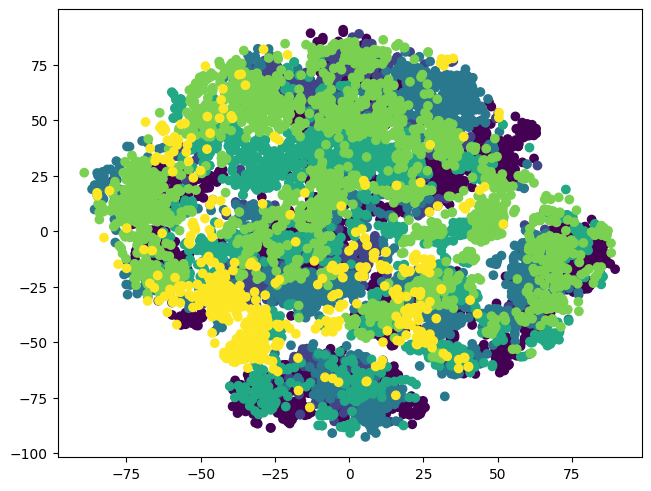

In [ ]:
plot_embed(reduced_data, labels)

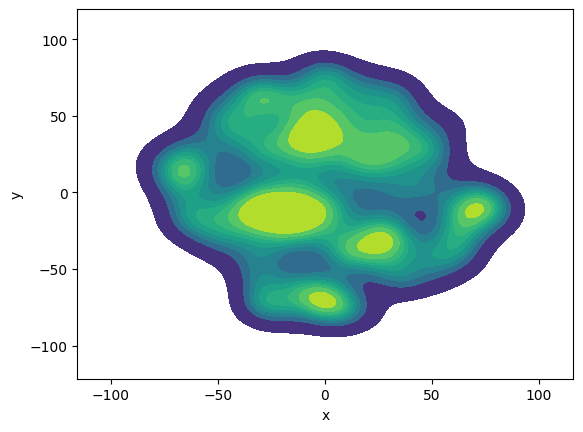

In [ ]:
import numpy as np
import seaborn as sns
# Criar um DataFrame pandas com os dados reduzidos
import pandas as pd
df = pd.DataFrame(reduced_data, columns=['x', 'y'])

# Criar um mapa de calor 2D que representa a densidade dos dados
sns.kdeplot(data=df, x='x', y='y', fill=True, cmap='viridis')

# Mostrar o gráfico
plt.show()

In [ ]:
output = tsne.fit_transform(embeds)
output.shape

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 7582
[t-SNE] Computed conditional probabilities for sample 2000 / 7582
[t-SNE] Computed conditional probabilities for sample 3000 / 7582
[t-SNE] Computed conditional probabilities for sample 4000 / 7582
[t-SNE] Computed conditional probabilities for sample 5000 / 7582
[t-SNE] Computed conditional probabilities for sample 6000 / 7582
[t-SNE] Computed conditional probabilities for sample 7000 / 7582
[t-SNE] Computed conditional probabilities for sample 7582 / 7582
[t-SNE] Mean sigma: 0.085305


KeyboardInterrupt: 

In [ ]:
plot_embed(output, labels)